In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your documents from JSON file
df = pd.read_json('updated_articles.json')

documents = df['content']

# Create TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=2000, min_df=10, stop_words='english')
X = vectorizer.fit_transform(documents)


from sklearn.decomposition import NMF

n_topics = 10
model = NMF(n_components=n_topics, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_


# Creating a DataFrame for our document-topic matrix
df_topics = pd.DataFrame(W, columns=[f"topic_{i}" for i in range(n_topics)])

# Concatenating the topic scores to our original dataframe
df = pd.concat([df, df_topics], axis=1)


In [38]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(model, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
gov uk page additional search cookies government help improve living
Topic 1:
climate cop26 change carbon emissions adaptation zero global finance action
Topic 2:
fishing fish fisheries anglers rod agency angling gov river illegal
Topic 3:
water agency environment river pollution bathing companies sewage quality drought
Topic 4:
defence technology uk dstl research gov armed science training forces
Topic 5:
flood flooding risk agency coastal scheme defences gov environment maintenance
Topic 6:
farmers food farming payments rural land industry secretary eu agricultural
Topic 7:
natural england nature wildlife project species marine conservation highways trees
Topic 8:
waste agency site illegal environment crime environmental gov permit court
Topic 9:
trade uk british international foreign world minister business rights global


In [39]:
df['date'] = pd.to_datetime(df['date'], format='%d %B %Y', errors='coerce')
df.index = df['date']
df['year-month'] = df.index.to_period('M')
df['Date (by month)'] = df['year-month'].dt.to_timestamp()
df = df.set_index('Date (by month)') 
columns = [f'topic_{i}' for i in range(9)]
columns.append('year-month')
df = df[columns]

In [55]:
def get_topic_titles(model, feature_names, no_top_words):
    topic_titles = []
    for topic_idx, topic in enumerate(model.components_):
        topic_title = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_titles.append(f"Topic {topic_idx}: {topic_title}")
    return topic_titles

no_top_words = 10
topic_titles = get_topic_titles(model, vectorizer.get_feature_names_out(), no_top_words)

In [51]:
df.groupby

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,year-month
Date (by month),,,,,,,,,,
2023-03-01,0.055688,0.000000,0.000000,0.018734,0.000000,0.007796,0.000000,0.008125,0.243745,2023-03
2019-12-01,0.043228,0.000000,0.005520,0.047940,0.000000,0.146792,0.004348,0.000000,0.004173,2019-12
2019-10-01,0.027520,0.000000,0.063894,0.140617,0.000000,0.020779,0.018970,0.003564,0.052981,2019-10
2022-05-01,0.127696,0.021057,0.005061,0.037328,0.000000,0.004137,0.021253,0.019162,0.023993,2022-05
2019-11-01,0.093525,0.003426,0.009537,0.018299,0.025271,0.073839,0.013707,0.017646,0.021117,2019-11
...,...,...,...,...,...,...,...,...,...,...
2019-04-01,0.100433,0.009346,0.000000,0.023547,0.051618,0.002013,0.000000,0.004889,0.000000,2019-04
2021-10-01,0.029183,0.087649,0.000000,0.000000,0.040444,0.015508,0.015726,0.047855,0.000000,2021-10
2022-08-01,0.065527,0.000000,0.019572,0.001932,0.014136,0.003418,0.037518,0.024870,0.016942,2022-08


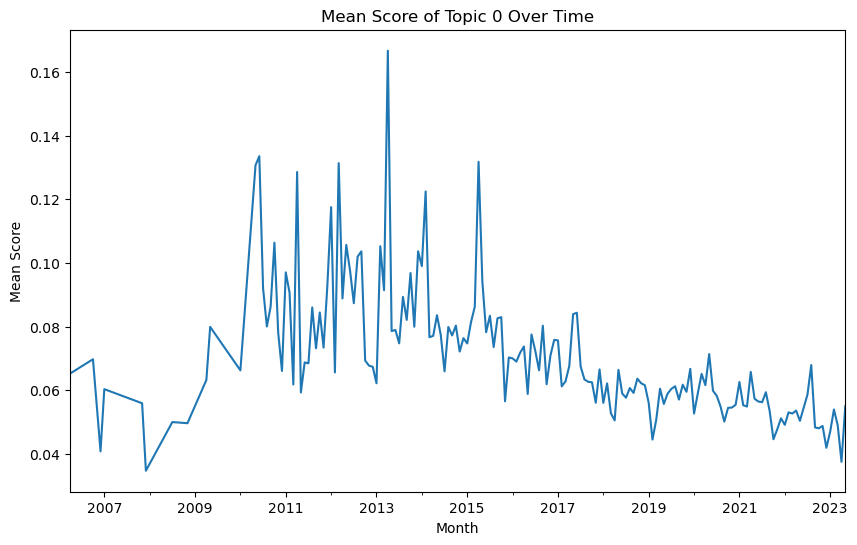

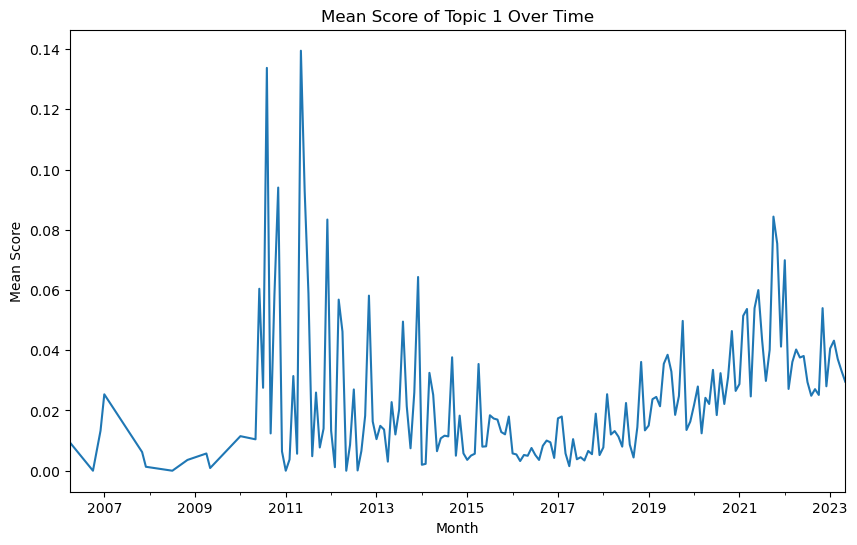

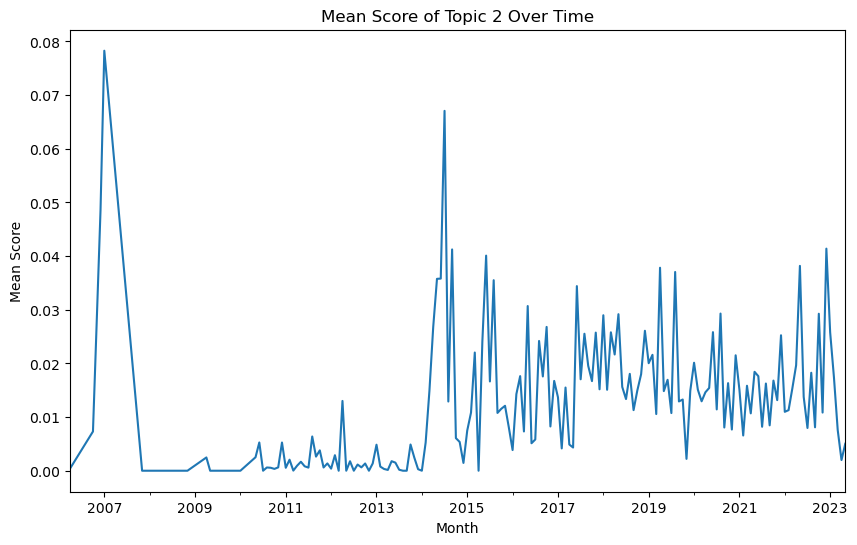

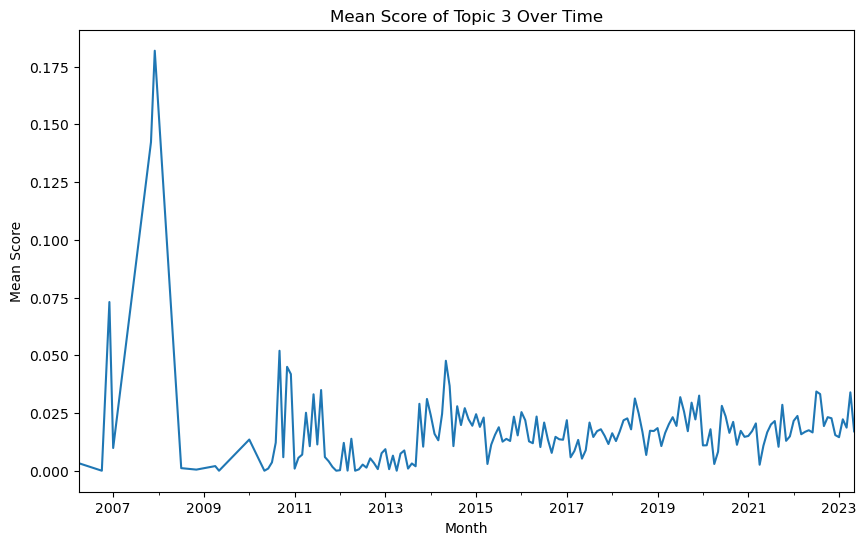

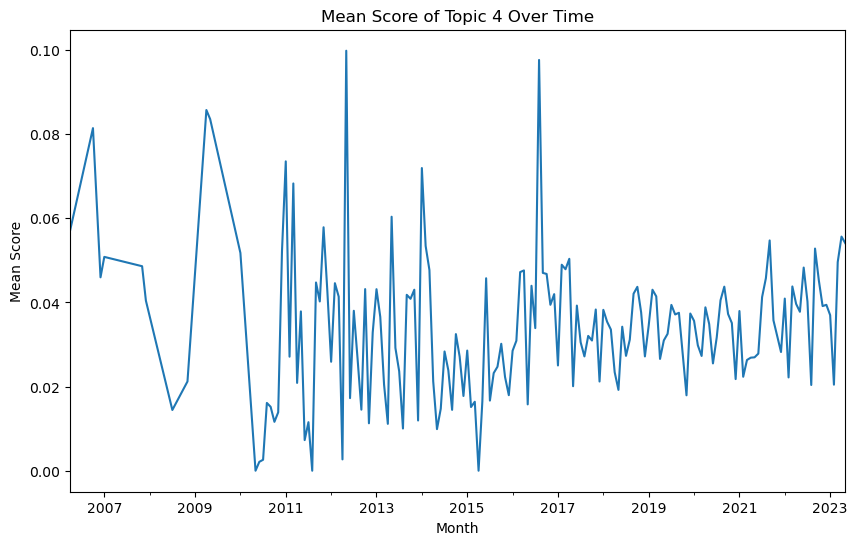

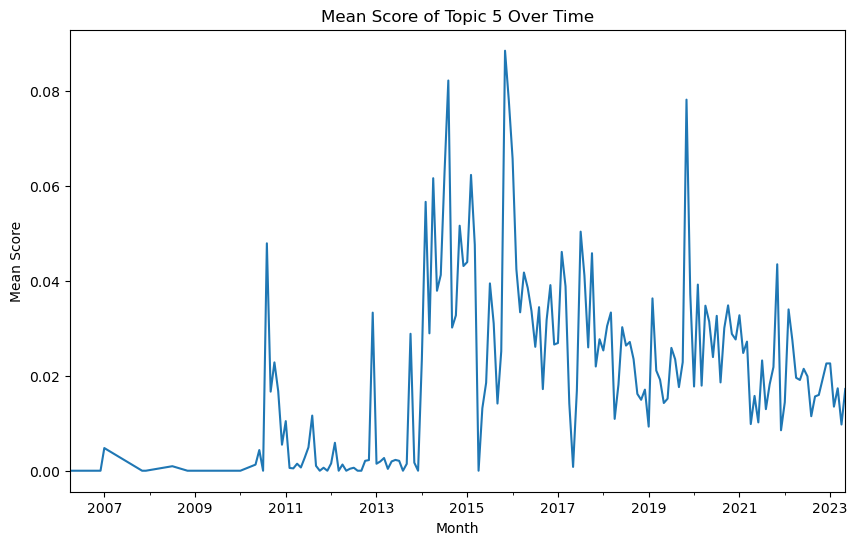

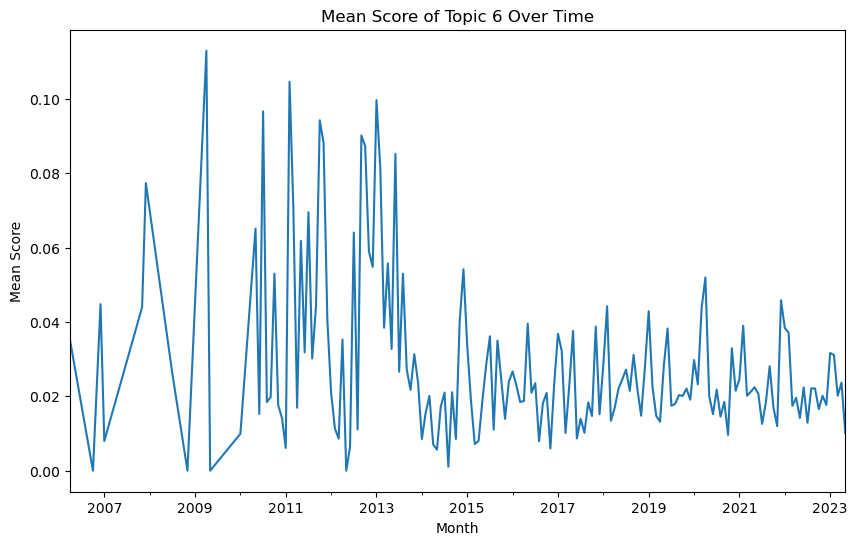

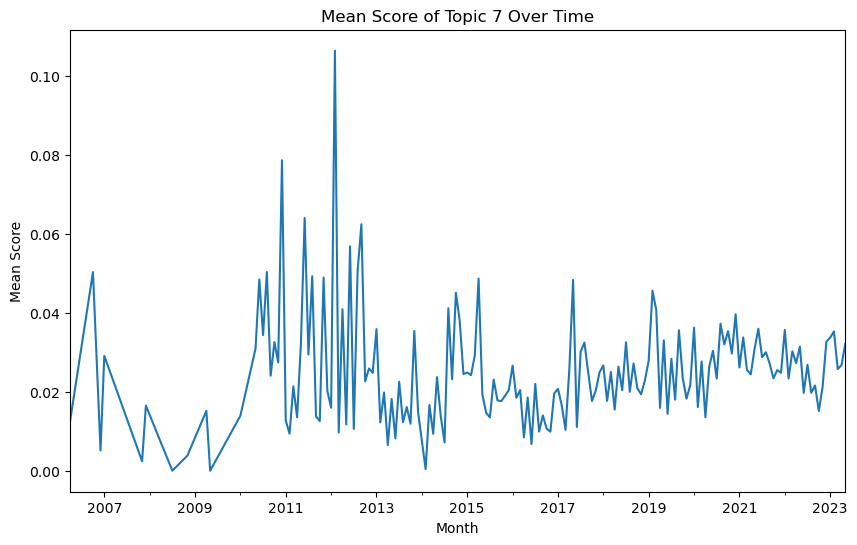

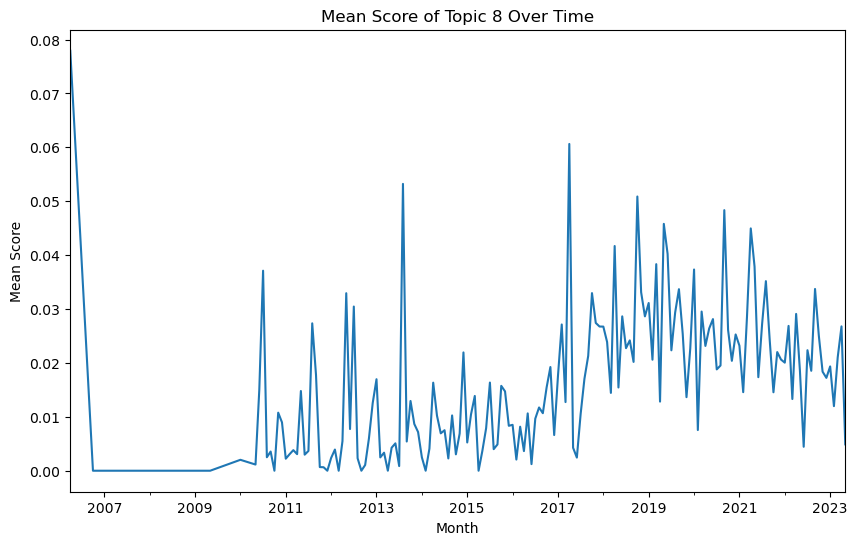

In [62]:
import matplotlib.pyplot as plt

monthly_means = df.groupby("year-month").mean()

# Plot topics
for i in range(9):  # Change this to the number of topics you have
    plt.figure(figsize=(10, 6))
    monthly_means[f'topic_{i}'].plot(kind='line')
    plt.title(f'Mean Score of Topic {i} Over Time')
    plt.xlabel('Month')
    plt.ylabel('Mean Score')
    plt.show()
